In [1]:
import os
import elevation #to download the DEM data
import rasterio as rio
import rioxarray as riox
from rasterio.plot import show
import geopandas as gpd
import folium as fl


/home/cperalta/anaconda3/envs/py310/lib/python3.10/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.1.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [2]:
data_path="data/DK/kvarterPolygon.shp"
df_cph_shp = gpd.read_file(data_path)

In [3]:
df_cph_shp

,v_id,kvarternr,kvarternav,ogc_fid,geometry
0,1.0,20101,Middelalderbyen,1,"POLYGON ((12.58005 55.67215, 12.58011 55.67212..."
1,2.0,20102,Metropolzonen,2,"POLYGON ((12.57140 55.67555, 12.57111 55.67543..."
2,3.0,20103,Nansensgade-Kvarteret,3,"POLYGON ((12.56247 55.68027, 12.56035 55.68109..."
3,4.0,20104,Øster Farimagsgade-kvarteret,4,"POLYGON ((12.57616 55.68629, 12.57377 55.68457..."
4,5.0,20105,Østerport,5,"POLYGON ((12.59907 55.68887, 12.59912 55.68890..."
...,...,...,...,...,...
62,62.0,21206,Kolonihavekvarteret,62,"POLYGON ((12.59221 55.63836, 12.59222 55.63830..."
63,63.0,21207,Sundbyvester,63,"POLYGON ((12.61571 55.64345, 12.61577 55.64332..."
64,64.0,21208,Sundholmsvejs kvarteret,64,"POLYGON ((12.60477 55.65652, 12.60392 55.65522..."
65,65.0,21209,Urbanplanen,65,"POLYGON ((12.59823 55.64865, 12.59823 55.64864..."


In [4]:

    
m = fl.Map(zoom_start=100, tiles="OpenStreetMap")
# the line above plots the whole world. To use a more precise zoom use https://stackoverflow.com/questions/73405381/folium-get-location-and-zoom-level


for _, r in df_cph_shp.iterrows():
    sim_geo = gpd.GeoSeries(r["geometry"]).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = fl.GeoJson(data=geo_j, style_function=lambda x: {"fillColor": "orange"})
    fl.Popup(r["kvarternav"]).add_to(geo_j)
    geo_j.add_to(m)
m    

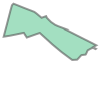

In [7]:
# To download the DEM, let us choose one of the neighbourhood Metropolozonen.

from shapely.ops import unary_union

selected_province = 'Metropolzonen'
gdf_selected_province = df_cph_shp[df_cph_shp['kvarternav']==selected_province]
selected_polygon = unary_union(gdf_selected_province['geometry'].values)
selected_polygon

make: Entering directory '/home/cperalta/.cache/elevation/SRTM1'
make: Nothing to be done for 'download'.
make: Leaving directory '/home/cperalta/.cache/elevation/SRTM1'
make: Entering directory '/home/cperalta/.cache/elevation/SRTM1'
make: Nothing to be done for 'all'.
make: Leaving directory '/home/cperalta/.cache/elevation/SRTM1'
make: Entering directory '/home/cperalta/.cache/elevation/SRTM1'
cp SRTM1.vrt SRTM1.3c483890e3ea48c8a65b2d6a82036861.vrt
make: Leaving directory '/home/cperalta/.cache/elevation/SRTM1'
make: Entering directory '/home/cperalta/.cache/elevation/SRTM1'
gdal_translate -q -co TILED=YES -co COMPRESS=DEFLATE -co ZLEVEL=9 -co PREDICTOR=2 -projwin 12.55520954984142 55.68213750568414 12.578974202856068 55.66770582177897 SRTM1.3c483890e3ea48c8a65b2d6a82036861.vrt /media/cperalta/USB128_extra/data/scripts/python/learning/learning/GIS/data/DK/dem_cph_metropolzonen.tif
rm -f SRTM1.3c483890e3ea48c8a65b2d6a82036861.vrt
make: Leaving directory '/home/cperalta/.cache/elevati

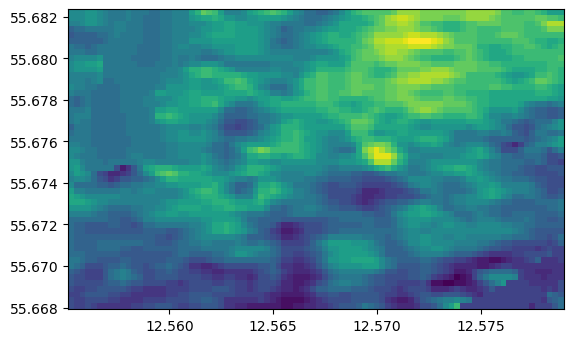

<AxesSubplot:>

In [9]:
output = os.path.join(os.getcwd(),'data/DK/dem_cph_metropolzonen.tif')
bounds = selected_polygon.bounds
west_c, south_c, east_c, north_c = bounds
elevation.clip(bounds=bounds, output=output, product='SRTM1')
dem = rio.open(output)
show(dem)


make: Entering directory '/home/cperalta/.cache/elevation/SRTM3'
curl -s -o spool/srtm_39_01.zip.temp https://srtm.csi.cgiar.org/wp-content/uploads/files/srtm_5x5/TIFF/srtm_39_01.zip && mv spool/srtm_39_01.zip.temp spool/srtm_39_01.zip
unzip -qq -d spool spool/srtm_39_01.zip srtm_39_01.tif 2>/dev/null || touch spool/srtm_39_01.tif
gdal_translate -q -co TILED=YES -co COMPRESS=DEFLATE -co ZLEVEL=9 -co PREDICTOR=2 spool/srtm_39_01.tif cache/srtm_39_01.tif 2>/dev/null || touch cache/srtm_39_01.tif
rm spool/srtm_39_01.zip spool/srtm_39_01.tif
make: Leaving directory '/home/cperalta/.cache/elevation/SRTM3'
make: Entering directory '/home/cperalta/.cache/elevation/SRTM3'
gdalbuildvrt -q -overwrite SRTM3.vrt cache/srtm_39_01.tif
make: Leaving directory '/home/cperalta/.cache/elevation/SRTM3'
make: Entering directory '/home/cperalta/.cache/elevation/SRTM3'
cp SRTM3.vrt SRTM3.ee9eca2ff04940c08464dd0491f3f035.vrt
make: Leaving directory '/home/cperalta/.cache/elevation/SRTM3'
make: Entering direc

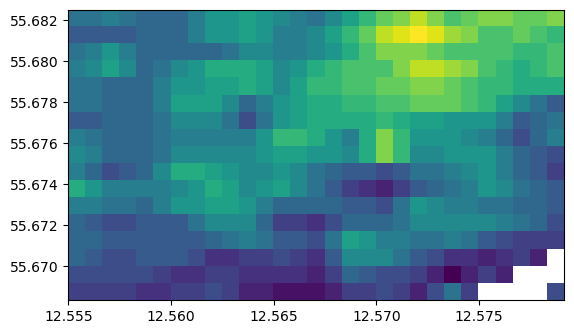

<AxesSubplot:>

In [11]:
elevation.clip(bounds=bounds, output=output,product="SRTM3")
dem = rio.open(output)
show(dem)
